In [58]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [59]:
!unzip  drive/My\ Drive/images

Archive:  drive/My Drive/images.zip
   creating: images/
   creating: images/cats/
  inflating: images/cats/cat.1.jpg   
  inflating: images/cats/cat.10.jpg  
  inflating: images/cats/cat.100.jpg  
  inflating: images/cats/cat.101.jpg  
  inflating: images/cats/cat.102.jpg  
  inflating: images/cats/cat.103.jpg  
  inflating: images/cats/cat.104.jpg  
  inflating: images/cats/cat.105.jpg  
  inflating: images/cats/cat.106.jpg  
  inflating: images/cats/cat.107.jpg  
  inflating: images/cats/cat.108.jpg  
  inflating: images/cats/cat.109.jpg  
  inflating: images/cats/cat.11.jpg  
  inflating: images/cats/cat.110.jpg  
  inflating: images/cats/cat.111.jpg  
  inflating: images/cats/cat.112.jpg  
  inflating: images/cats/cat.113.jpg  
  inflating: images/cats/cat.114.jpg  
  inflating: images/cats/cat.115.jpg  
  inflating: images/cats/cat.116.jpg  
  inflating: images/cats/cat.117.jpg  
  inflating: images/cats/cat.118.jpg  
  inflating: images/cats/cat.119.jpg  
  inflating: images/cat

In [0]:
!ls

drive  images  sample_data


In [0]:
path = 'images/'

In [0]:
import os

In [0]:
folders = os.listdir(path)

In [76]:
images = {}
for f in folders:
  print(f+' has %d images '%len(os.listdir('images/'+f+'/')))

cats has 161 images 
dogs has 161 images 
humans has 161 images 
horses has 161 images 


In [0]:
import keras
import keras.callbacks
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing import image

### CNN model

In [0]:
# model architecture
def create_model():
  reg = 0.0001
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3), kernel_regularizer=keras.regularizers.l2(reg)))
  model.add(MaxPool2D(2, 2))
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape = (28, 28, 1), kernel_regularizer=keras.regularizers.l2(reg) ))
  model.add(MaxPool2D(2, 2))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', input_shape = (28, 28, 1), kernel_regularizer=keras.regularizers.l2(reg)))
  model.add(MaxPool2D(2, 2))
  model.add(Conv2D(128, (3, 3), activation='relu', input_shape = (28, 28, 1), kernel_regularizer=keras.regularizers.l2(reg)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(2, 2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  model.summary()
  return model

In [143]:
model = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 17, 17, 128)       0         
__________

In [0]:
# compile the model
adam = keras.optimizers.adam(lr = 1e-4)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

In [145]:
gen = image.ImageDataGenerator(rescale=1/255.0, validation_split=0.3)
train_gen = gen.flow_from_directory(
    'images/',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    
   
)
val_gen = gen.flow_from_directory(
    'val/',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    
   
)


Found 644 images belonging to 4 classes.
Found 164 images belonging to 4 classes.


In [146]:
x, y = train_gen.next() # it gives next batch
print(x.shape, y.shape)

(32, 150, 150, 3) (32, 4)


In [147]:
hist = model.fit_generator(
    train_gen,
    epochs = 50,
    steps_per_epoch = 7,
    validation_data = val_gen,
    validation_steps = 4,
)

Epoch 1/50
7/7 [==============================] - 3s 415ms/step - loss: 1.6913 - acc: 0.3304 - val_loss: 1.6272 - val_acc: 0.4141
Epoch 2/50
7/7 [==============================] - 0s 40ms/step - loss: 1.4421 - acc: 0.4286 - val_loss: 1.3033 - val_acc: 0.4500
Epoch 3/50
7/7 [==============================] - 0s 36ms/step - loss: 1.2379 - acc: 0.4863 - val_loss: 1.3423 - val_acc: 0.4500
Epoch 4/50
7/7 [==============================] - 1s 134ms/step - loss: 0.7487 - acc: 0.7366 - val_loss: 1.1951 - val_acc: 0.5234
Epoch 5/50
7/7 [==============================] - 1s 100ms/step - loss: 0.5715 - acc: 0.8125 - val_loss: 0.9805 - val_acc: 0.6600
Epoch 6/50
7/7 [==============================] - 1s 92ms/step - loss: 0.6556 - acc: 0.7454 - val_loss: 1.2597 - val_acc: 0.5000
Epoch 7/50
7/7 [==============================] - 1s 113ms/step - loss: 0.3678 - acc: 0.9330 - val_loss: 1.0923 - val_acc: 0.5469
Epoch 8/50
7/7 [==============================] - 1s 103ms/step - loss: 0.3861 - acc: 0.8884 

In [0]:
def plot_loss_accuracy():
  # plot loss
  print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
  print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.plot(hist.history['loss'], label='training_loss')

  # plot accuracy
  plt.plot(hist.history['val_acc'], label='val_acc')
  plt.plot(hist.history['acc'], label='training_acc')
  plt.legend()
  plt.show()

training_loss = 0.037691457995346615    val_loss = 0.840658233165741
training_acc = 100.0    val_acc = 71.0


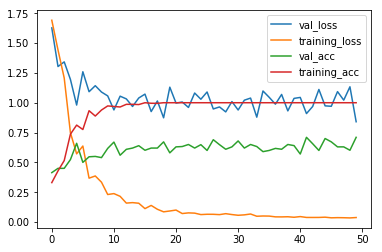

In [149]:
plot_loss_accuracy()

In [0]:
folders

In [0]:
import os, shutil

In [0]:
if not os.path.isdir('val'):
  os.mkdir('val')  

In [0]:
for c in folders:
  p = os.path.join('val', c)
  if not os.path.isdir(p):
    os.mkdir(p)

In [0]:
SPLIT = 0.8



In [0]:
for f in folders:
  path = 'images/'+f
  imgs = os.listdir(path)
  split_size = int(SPLIT*len(imgs))
  file_to_move = imgs[split_size:]
  
  for img_f in file_to_move:
    src = os.path.join(path, img_f)
    dest = os.path.join('val/'+f, img_f)
    shutil.move(src, dest)
    
  
  

In [0]:
#training data
print('training data')
for f in folders:
  path = 'images/'+f
  print(f + " " + str(len(os.listdir(path))))
print('validation data')
for f in folders:
  path = 'val/'+f
  print(f + " " + str(len(os.listdir(path))))
  
  

In [0]:
shutil.rmtree('images')